#Introduction to convolutional neural network and computer vision with tensorflow:

computer vision is the practice of writing  algorithms which can discover patterns in visual data.such as the camera of the self driving car recognizing the car in front

#Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-02-10 04:58:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   196MB/s    in 0.5s    

2024-02-10 04:58:54 (196 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} in {dirpath}")


there are 2 directories and 0 in pizza_steak
there are 2 directories and 0 in pizza_steak/train
there are 0 directories and 750 in pizza_steak/train/steak
there are 0 directories and 750 in pizza_steak/train/pizza
there are 2 directories and 0 in pizza_steak/test
there are 0 directories and 250 in pizza_steak/test/steak
there are 0 directories and 250 in pizza_steak/test/pizza


In [ ]:
#another way to find no of images in file
num_pizza_images=len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")#turn our trainning path into a python path
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
#lets visualiz our images
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup target diretory(we will view images from here)
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image[0])

  #read in the image and plot it using matplotlib.image
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  #plt.axis("off")

  print(f"Image shape: {img.shape}")#shows the shape of the image

  return img

2818805.jpg
Image shape: (384, 512, 3)


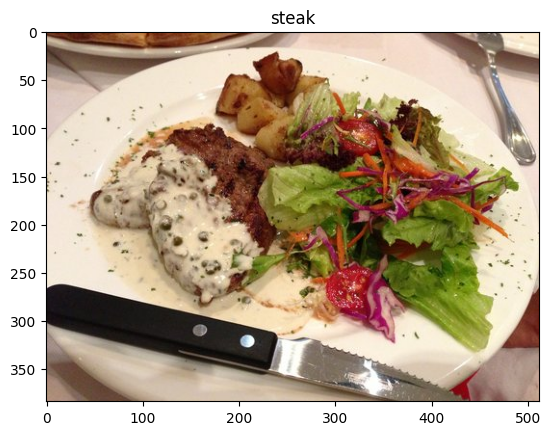

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

In [ ]:
# View the img (actually just a big array/tensor)
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[118,  60,  38],
        [117,  59,  35],
        [121,  61,  37],
        ...,
        [252, 232, 207],
        [253, 233, 208],
        [254, 234, 209]],

       [[110,  53,  33],
        [110,  54,  31],
        [113,  55,  31],
        ...,
        [253, 233, 208],
        [253, 233, 208],
        [253, 233, 208]],

       [[104,  52,  31],
        [106,  54,  33],
        [111,  59,  37],
        ...,
        [251, 234, 208],
        [252, 232, 207],
        [252, 232, 207]],

       ...,

       [[180, 145, 126],
        [176, 143, 124],
        [175, 142, 123],
        ...,
        [192, 160, 139],
        [193, 161, 140],
        [196, 164, 143]],

       [[179, 142, 124],
        [178, 143, 124],
        [179, 144, 125],
        ...,
        [195, 160, 140],
        [196, 161, 141],
        [198, 163, 143]],

       [[181, 144, 126],
        [182, 145, 127],
        [181, 146, 127],
        ...,
        [198, 163, 14

In [ ]:
#view the image shape
img.shape #return width height and color channel

(384, 512, 3)

In [ ]:
#get all the pixel values between 0 & 1(scale/normalize as neural network likes values in between 0 & 1)
img/255.

array([[[0.4627451 , 0.23529412, 0.14901961],
        [0.45882353, 0.23137255, 0.1372549 ],
        [0.4745098 , 0.23921569, 0.14509804],
        ...,
        [0.98823529, 0.90980392, 0.81176471],
        [0.99215686, 0.91372549, 0.81568627],
        [0.99607843, 0.91764706, 0.81960784]],

       [[0.43137255, 0.20784314, 0.12941176],
        [0.43137255, 0.21176471, 0.12156863],
        [0.44313725, 0.21568627, 0.12156863],
        ...,
        [0.99215686, 0.91372549, 0.81568627],
        [0.99215686, 0.91372549, 0.81568627],
        [0.99215686, 0.91372549, 0.81568627]],

       [[0.40784314, 0.20392157, 0.12156863],
        [0.41568627, 0.21176471, 0.12941176],
        [0.43529412, 0.23137255, 0.14509804],
        ...,
        [0.98431373, 0.91764706, 0.81568627],
        [0.98823529, 0.90980392, 0.81176471],
        [0.98823529, 0.90980392, 0.81176471]],

       ...,

       [[0.70588235, 0.56862745, 0.49411765],
        [0.69019608, 0.56078431, 0.48627451],
        [0.68627451, 0

## An end-to-end example:

lets build a convolutional neural network to find patterns in our images more specifically we a need way to:
* load our images
* preprocess our images
* build a CNN to find patterns in our images
* compile our CNN
* fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 & 1,also called scaling or normalization)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1.255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
#Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding ="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])


#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 232ms/step - loss: 0.6268 - accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4707 - accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.3985 - accuracy: 0.8353
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3615 - accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.2945 - accuracy: 0.8813


> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Using non convolutional model (model we used in previous section):

 lets see how it works on image data

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a non convulational neural network model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),#dense layer expect 1 d input
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=(len(train_data)),
            validation_data=valid_data,
            validation_steps=len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 120ms/step - loss: 0.7718 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more features than our CNN (model_1),model_2 performs terribly.. lets try to improve it

In [ ]:
#set random seed
tf.random.set_seed(42)

#create model(same as above but lets add extra layers and increase the no hidden unitd of eacj layer)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model:ssS
history_3=model_3.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 118ms/step - loss: 3.8121 - accuracy: 0.5913 - val_loss: 420.8675 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 6s 126ms/step - loss: 1.2485 - accuracy: 0.6780 - val_loss: 244.6013 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6579 - accuracy: 0.7147 - val_loss: 117.5483 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.5751 - accuracy: 0.7420 - val_loss: 55.2290 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4484 - accuracy: 0.7967 - val_loss: 50.6555 - val_accuracy: 0.7980


In [ ]:
#get the summary of the model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


My gosh, the number of trainable parameters has increased even more than `model_2`. And even with close to 500x (~15,000,000 vs. ~31,000) more trainable parameters, `model_3` still doesn't out perform `model_1`.

This goes to show the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

2154126.jpg
Image shape: (512, 512, 3)
2707814.jpg
Image shape: (512, 512, 3)


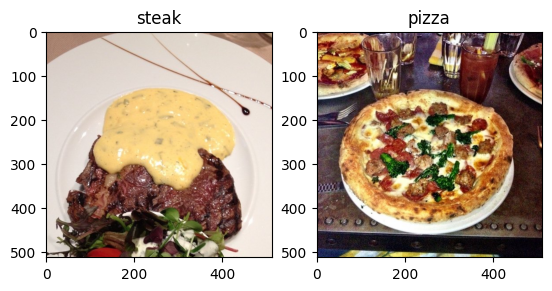

In [ ]:
#visuilize the data
plt.figure
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)


In [ ]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [ ]:
#create the train and test data generators and rescale  the data
from tensorflow.keras.preprocessing .image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
#load in image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,#target directory we use
                                              target_size=(224,224), #target size of output
                                              class_mode="binary",#type of data we working with
                                              batch_size=32) #minimum batch size of data

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#get the sample of train data batch
images,labels=train_data.next() # get the 'next' batch of images/labels
len(images),len(labels)

(32, 32)

In [ ]:
#how many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#get the first two images
images[:2] ,images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [ ]:
images[6]

array([[[0.45098042, 0.14509805, 0.05490196],
        [0.45882356, 0.15294118, 0.0627451 ],
        [0.46274513, 0.15686275, 0.06666667],
        ...,
        [0.37647063, 0.19607845, 0.10196079],
        [0.3803922 , 0.20000002, 0.10980393],
        [0.35686275, 0.17254902, 0.09411766]],

       [[0.47058827, 0.16862746, 0.06666667],
        [0.4784314 , 0.1764706 , 0.07450981],
        [0.4784314 , 0.1764706 , 0.07450981],
        ...,
        [0.38431376, 0.20392159, 0.10980393],
        [0.38823533, 0.20784315, 0.11764707],
        [0.37647063, 0.19215688, 0.1137255 ]],

       [[0.47450984, 0.17254902, 0.05490196],
        [0.48235297, 0.18039216, 0.0627451 ],
        [0.47058827, 0.16862746, 0.0509804 ],
        ...,
        [0.3921569 , 0.21176472, 0.10980393],
        [0.3921569 , 0.21176472, 0.11764707],
        [0.3921569 , 0.21176472, 0.12156864]],

       ...,

       [[0.7137255 , 0.6039216 , 0.5568628 ],
        [0.7294118 , 0.627451  , 0.5764706 ],
        [0.7490196 , 0

In [ ]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a model (start with a baseline)
to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.


In [ ]:
#make creating our model little easier
from tensorflow.keras.layers import Dense, Conv2D , Flatten , MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,                  #no of sliding windows going across input(higher value for complex model)
           kernel_size=3,#same as (3,3) #size of sliding window going across input
           strides=1, #same as (1,1)    #size of step of sliding window takes across input
           padding="valid",             #if padding="same" output shape is same as input ,if padding="valid" output shape get compressed
           activation="relu",
           input_shape=(224,224,3)),#input layer(specify input shape)
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")#output layer(specify the output shape)

])

In [ ]:
#compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#get the summary of model 4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4.fit the model

In [ ]:
#check the lengths of train and test data
len(train_data),len(test_data)

(47, 16)

In [ ]:
#fit the model
history_4=model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 164ms/step - loss: 1.0582 - accuracy: 0.6473 - val_loss: 0.5393 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4364 - accuracy: 0.8040 - val_loss: 0.3655 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3215 - accuracy: 0.8600 - val_loss: 0.3167 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 12s 250ms/step - loss: 0.1980 - accuracy: 0.9387 - val_loss: 0.3610 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 8s 165ms/step - loss: 0.0853 - accuracy: 0.9793 - val_loss: 0.3533 - val_accuracy: 0.8580


#5.Evaluate the model

<Axes: >

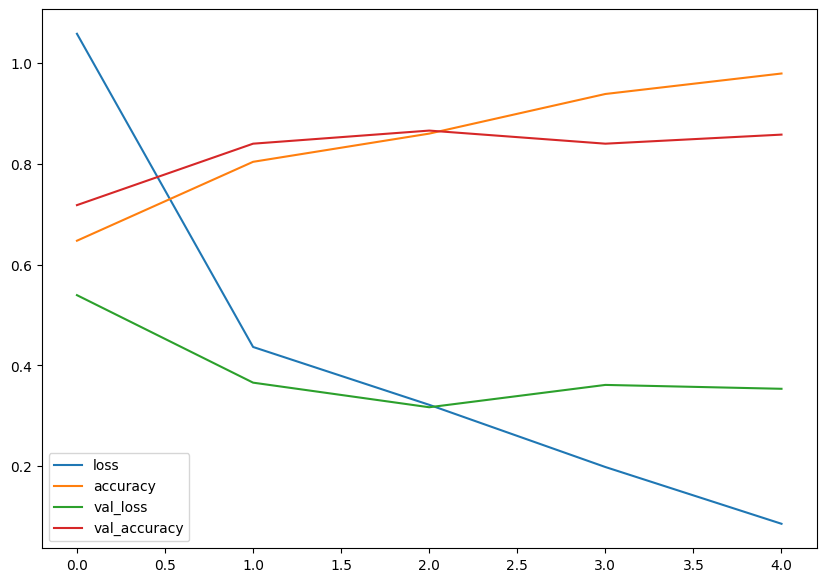

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
#plotting the loss and accuracy curves of validation and trainning data seperately

def plot_loss_curves(history):
  " Returns separate loss curves for training and validation metrics."

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plotting the loss
  plt.plot(epochs,loss,label="trainning loss")
  plt.plot(epochs,val_loss,label="validation loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  #plot accuracy:
  plt.figure();
  plt.plot(epochs,accuracy,label="trainning accuracy")
  plt.plot(epochs,val_accuracy,label="validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()



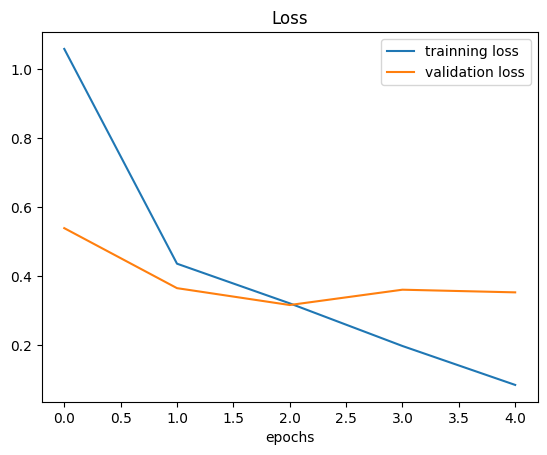

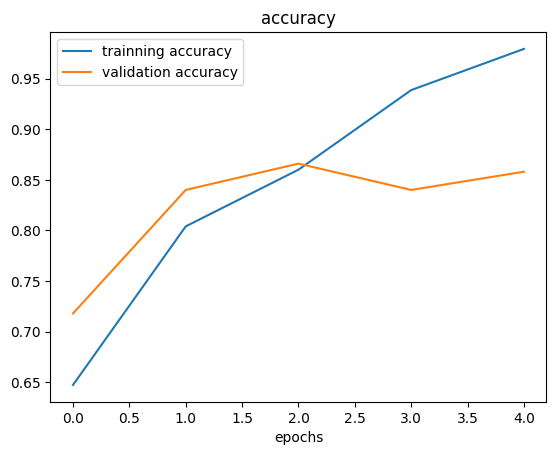

In [ ]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

### 6.Adjust the model parameters:
1. create baseline  model
2. beat a baseline by overfitting a largers model
3. reduce the overfitting

Ways to induce overfitting:

1. add more Conv2D layers
2. add more filters to Conv2d layers
3. add another dense layer to the output of the flatten layer

ways to reduce overfitting
1. add data augmentation
2. add regularization layers(such as MaxPool2D)
3. add more data


In [ ]:
#create  a model 5:
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

#compile the model:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 137ms/step - loss: 0.6155 - accuracy: 0.6720 - val_loss: 0.5089 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4952 - accuracy: 0.7733 - val_loss: 0.4442 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4496 - accuracy: 0.7933 - val_loss: 0.4150 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4412 - accuracy: 0.8100 - val_loss: 0.3888 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4212 - accuracy: 0.8027 - val_loss: 0.4096 - val_accuracy: 0.8280


In [ ]:
#get the summary of our model with  maxpool()layer
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

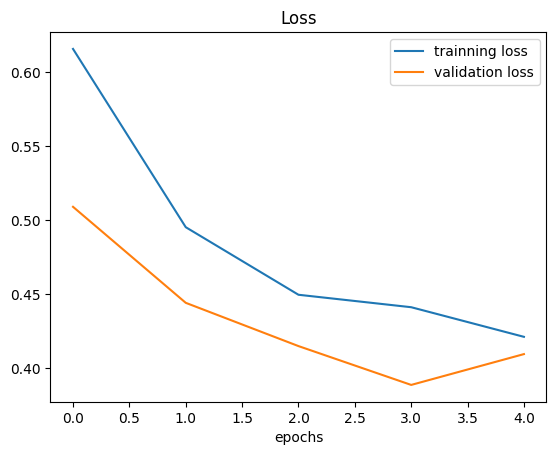

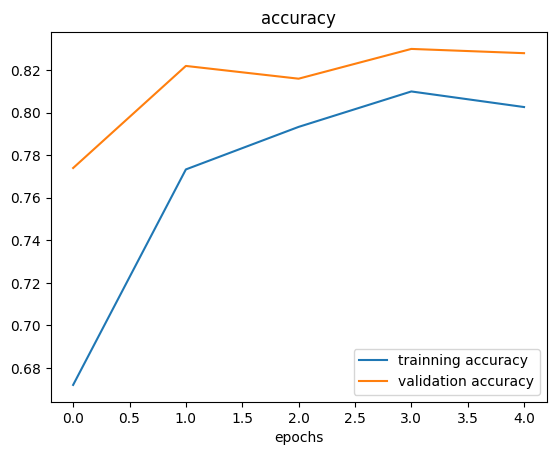

In [ ]:
#lets plot the loss curves of our model_5
plot_loss_curves(history_5)

In [ ]:
#create ImageDataGenerator training instance with data augmentation
train_datagen_augumented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                            shear_range=0.2, # shear the image
                                            zoom_range=0.2, # zoom into the image
                                            width_shift_range=0.2,## shift the image width ways
                                            height_shift_range=0.2, # shift the image height ways
                                            horizontal_flip=True # flip the image on the horizontal axis
                                            )
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
#import data and augment it from training directory:
print("augmented training data:")
train_data_augmented=train_datagen_augumented.flow_from_directory(train_dir,
                                                                  batch_size=32,
                                                                  target_size=(224,224),
                                                                  class_mode="binary",
                                                                  shuffle=False)#demonstration purpose only

#creating non augmented trainning data:
print("non_augumented training data:")
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             shuffle=False)
#create non augmeneted testing data:
print("non augmented testing data:")
test_data=train_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            shuffle=False)

augmented training data:
Found 1500 images belonging to 2 classes.
non_augumented training data:
Found 1500 images belonging to 2 classes.
non augmented testing data:
Found 500 images belonging to 2 classes.


In [ ]:
#get data batch samples:
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()## Note: labels aren't augmented, they stay the same

the image number is 19


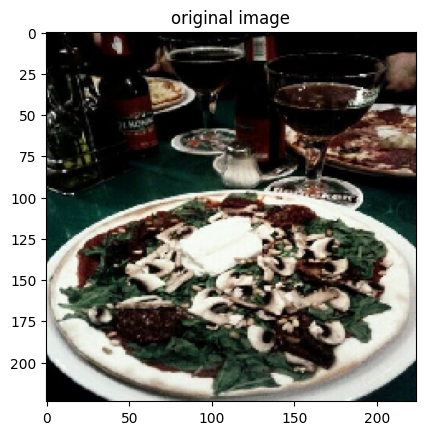

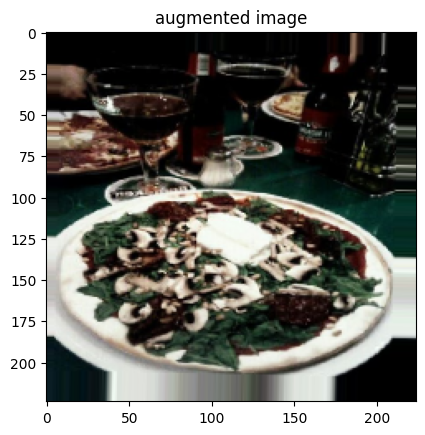

In [ ]:
#show original image and augmented image:
import random
random_no=random.randint(0,32)#batch size is of 32
print(f"the image number is {random_no}")
plt.imshow(images[random_no])
plt.title("original image")
plt.axis=False
plt.figure()
plt.imshow(augmented_images[random_no])
plt.title("augmented image")
plt.axis=False

In [ ]:
# now create a model similar to model_5 to work with augmented data
model_6=Sequential([
    Conv2D(10,3, activation="relu",input_shape=(224,224,3 )),
    MaxPool2D(pool_size=2),# reduce number of features by half
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model:
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model with augmented data
history_6=model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 487ms/step - loss: 0.8104 - accuracy: 0.4533 - val_loss: 0.6918 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6902 - accuracy: 0.5553 - val_loss: 0.6688 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6763 - accuracy: 0.6307 - val_loss: 0.6128 - val_accuracy: 0.6300
Epoch 4/5
47/47 [==============================] - 23s 493ms/step - loss: 0.7021 - accuracy: 0.5907 - val_loss: 0.6441 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6587 - accuracy: 0.5853 - val_loss: 0.5882 - val_accuracy: 0.7620


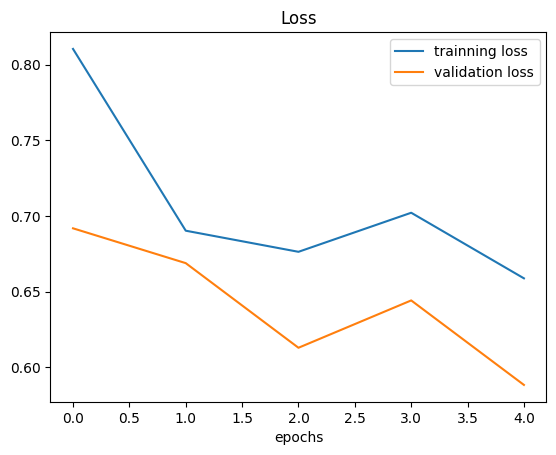

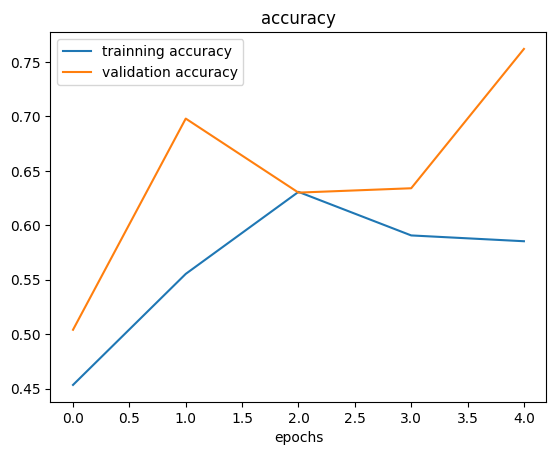

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)


Let's see what happens when we shuffle the augmented training data.

In [ ]:
#import and augment it from directory:
train_data_augumented_shuffled=train_datagen_augumented.flow_from_directory(train_dir,
                                                                               batch_size=32,
                                                                               target_size=(224,224),
                                                                               class_mode="binary",
                                                                               shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
#create a model same as model_6:
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model:
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

#Fit the model to augmented data:
history_7=model_7.fit(train_data_augumented_shuffled,
                    epochs=5,
                    steps_per_epoch=len(train_data_augumented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 487ms/step - loss: 0.6703 - accuracy: 0.6020 - val_loss: 0.5918 - val_accuracy: 0.6260
Epoch 2/5
47/47 [==============================] - 23s 499ms/step - loss: 0.5496 - accuracy: 0.7493 - val_loss: 0.4328 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 23s 497ms/step - loss: 0.5109 - accuracy: 0.7680 - val_loss: 0.3724 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4933 - accuracy: 0.7713 - val_loss: 0.3605 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 23s 492ms/step - loss: 0.4598 - accuracy: 0.7833 - val_loss: 0.3388 - val_accuracy: 0.8580


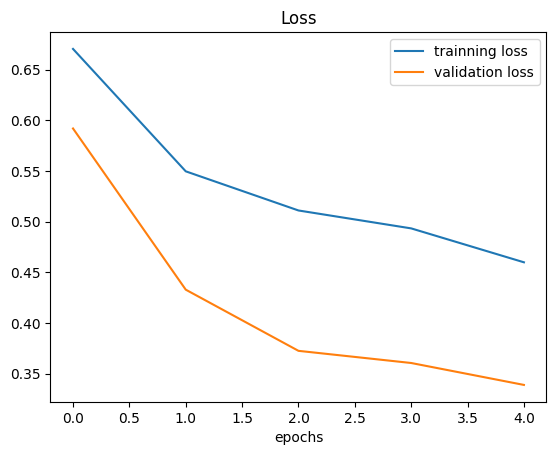

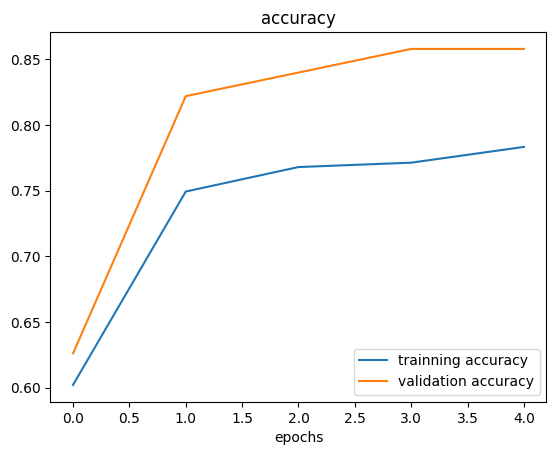

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because we shuffled the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augumented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 501ms/step - loss: 0.6367 - accuracy: 0.6487 - val_loss: 0.4723 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5151 - accuracy: 0.7420 - val_loss: 0.4802 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5136 - accuracy: 0.7580 - val_loss: 0.3820 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4773 - accuracy: 0.7773 - val_loss: 0.3249 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4527 - accuracy: 0.7947 - val_loss: 0.4073 - val_accuracy: 0.8160


## Making a prediction with our trained model

In [ ]:
# What classes has our model been trained on?
class_names


array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

--2024-02-10 05:09:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-02-10 05:09:37 (31.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



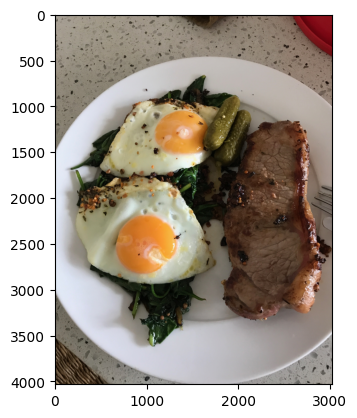

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
#plt.axis(False)

In [ ]:
#lets shape of image
steak.shape  #we trainned model with shape(224,224,3)

(4032, 3024, 3)

In [ ]:
steak #trannig tensors values lies between 0 and 1

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

 **🔑 Note** :
 remember we need to pass new data after preprocessin it as we preprocessed our trainning data

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):

  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """

  #read in the image
  img=tf.io.read_file(filename)

  #decode the read file into tensor
  img=tf.image.decode_image(img)

  #resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])

  #rescale the image (get all values between 0 and 1)
  img=img/255.

  return img


In [ ]:
#load in and preprocess our custom image:
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_8.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

In [ ]:
# Make a prediction on custom image tensor
pred=model_8.predict(steak)
pred

In [ ]:
model_7.predict(steak)

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class=class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """

  #import target image and preprocess it
  img = load_and_prep_image(filename)

  #make prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  #get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  #visualize the image
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")


In [ ]:
#test our model on custom data:
pred_and_plot(model_8,"03-steak.jpeg")

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification:

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?

How about we go through those steps again, except this time, we'll work with 10 different types of food.


1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

###1.Become one with data

In [ ]:

#download data file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
#walk through 10 classes of food image data:
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in ' {dirpath} ' ")

In [ ]:
#setup the train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [ ]:
#lets get the sub directories(these are our class names )
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
#visualize visualize visualize:
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

###2.preprocess the data(prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

test_data=train_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

### 3. Create a model (start with a baseline)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
#create a model baseline
model_9=Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")#chnage to have 10 output neurons and use activation function
])

#compile the model:
model_9.compile(loss=tf.keras.losses.categorical_crossentropy, # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



###4.fit the model:

In [ ]:
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25 * len(test_data))) #25%data for iteration

In [ ]:
len(train_data)

###5.evaluate the model

In [ ]:
model_9.evaluate(test_data)

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [ ]:
#lets try to simplyfy our model we will remove 2 conv2D layers
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
#plot loss curves for model 10
plot_loss_curves(history_10)

Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

In [ ]:
# Create augmented data generator instance
train_datagen_augumented=ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True
                                            )
train_data_augumented=train_datagen_augumented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")



In [ ]:
#create the model (use the same archietecture)
model_11=tf.keras.models.clone_model(model_10)

#compile the  model:
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#fit the model
history_11=model_11.fit(train_data_augumented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augumented),#use augumented data
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

In [ ]:
#plot the loss curves
plot_loss_curves(history_11)

 ### 7. Repeat until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning**.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

### Make some predictions

In [ ]:
#get the class names
class_names

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
#reconfig to work with multiclass images
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """

  #import target image and preprocess it
  img = load_and_prep_image(filename)

  #make prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round


  #visualize the image
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")


In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=list(class_names))

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: [transfer learning](https://dev.mrdbourke.com/tensorflow-deep-learning/04_transfer_learning_in_tensorflow_part_1_feature_extraction/) is going to step things up a notch).

### saving aand loading our model

In [ ]:
#save model
model_11.save("saved_trained_model_11")

In [ ]:
#load in atrainde model and evaluate it
loaded_model_11=tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

In [ ]:
#compare our model loaded model to our existing model:
model_11.evaluate(test_data)